In [128]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import datetime
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (16,7)

# MAKE SURE ALL OF THESE ARE INSTALLED

In [129]:
df = pd.read_csv('data/combined_tweets_filtered.csv')
users = df["user"].unique()

In [130]:
def get_engagements(df):
    viz_df = df.loc[df["has_viz"] == True]
    no_viz_df = df.loc[df["has_viz"] == False]
    
    viz_retweets = viz_df["retweets"].sum()
    viz_replies = viz_df["replies"].sum()
    viz_likes = viz_df["likes"].sum()
    viz_quotes = viz_df["quotes"].sum()
    
    no_viz_retweets = no_viz_df["retweets"].sum()
    no_viz_replies = no_viz_df["replies"].sum()
    no_viz_likes = no_viz_df["likes"].sum()
    no_viz_quotes = no_viz_df["quotes"].sum()
    
    viz_engagements = viz_retweets + viz_replies + viz_likes + viz_quotes
    no_viz_engagements = no_viz_retweets + no_viz_replies + no_viz_likes + no_viz_quotes
    
    total_engagements = viz_engagements + no_viz_engagements
    
    non_viz_tweets = len(no_viz_df)
    viz_tweets = len(viz_df)
    
#     print("viz tweets:", viz_tweets)
#     print("non viz tweets:", non_viz_tweets)
    
#     print("visualization tweet engagements: ", viz_engagements)
#     print("no visualization tweet engagements: ", no_viz_engagements)
#     print("total engagements: ", total_engagements)
    
    return viz_engagements, no_viz_engagements 

In [131]:
def get_tweets(df):
    viz_df = df.loc[df["has_viz"] == True]
    no_viz_df = df.loc[df["has_viz"] == False]
    
    non_viz_tweets = len(no_viz_df)
    viz_tweets = len(viz_df)
    
    return viz_tweets, non_viz_tweets

In [132]:
def show_agg_pies(df):
    all_viz_tweets = df.loc[df["has_viz"] == True]
    no_viz_tweets = df.loc[df["has_viz"] == False]
    
    labels = 'Viz', ' No-Viz'
    all_viz_tweets = len(all_viz_tweets)
    no_viz_tweets = len(no_viz_tweets)
    
#     all_viz_tweets, non_viz_tweets = len(all_viz_tweets), len(no_viz_tweets)
    sizes = []
    sizes.append(all_viz_tweets)
    sizes.append(no_viz_tweets)
    
    tweet_label = 'Viz: ' + str(all_viz_tweets)
    no_tweet_label = 'No-viz: ' + str(no_viz_tweets)
    
    legend_labels_1 = tweet_label, no_tweet_label
    
    #----------------------------------------------------------------------------#
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels_eng = 'Viz ', 'Non-Viz '
    viz_engagements, non_viz_engagements = get_engagements(df)
    sizes_eng = []
    sizes_eng.append(viz_engagements)
    sizes_eng.append(non_viz_engagements)
    
    eng_viz_label = 'Viz : ' + str(viz_engagements)
    eng_noviz_label = 'Non-Viz : ' + str(non_viz_engagements)
    legend_labels_2 = eng_viz_label, eng_noviz_label
    
    
    #----------------------------------------------------------------------------#
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    ax1.set_title("All tweets distribution")
    ax1.legend(legend_labels_1)
    
    ax2.pie(sizes_eng, labels=labels_eng, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax2.set_title("Proportion of Engagements")
    ax2.legend(legend_labels_2)
    
    
    fig.suptitle('Overall engagement statistics')

    plt.tight_layout()
    
    
    #-----------------------------------------------------------------------------#

#     plt.show()

In [133]:
def show_pies(disp_df, authorname):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Viz ', 'Non-Viz '
    viz_engagements, non_viz_engagements = get_engagements(disp_df)
    sizes = []
    sizes.append(viz_engagements)
    sizes.append(non_viz_engagements)
    
    viz_label = 'Viz: ' + str(viz_engagements)
    non_viz_label = 'Non-viz: ' + str(non_viz_engagements)
    
    legend_labels_1 = viz_label, non_viz_label
    
    #----------------------------------------------------------------------------#
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels2 = 'Viz', ' Viz'
    viz_tweets, non_viz_tweets = get_tweets(disp_df)
    sizes_2 = []
    sizes_2.append(viz_tweets)
    sizes_2.append(non_viz_tweets)
    
    tweet_label = 'Tweets with viz: ' + str(viz_tweets)
    no_tweet_label = 'Tweets without viz: ' + str(non_viz_tweets)
    
    legend_labels_2 = tweet_label, no_tweet_label
    
    #-----------------------------------------------------------------------------#
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
#     ax1.set_title("Proportion of Engagements")
    ax1.axis('equal')
    ax1.legend(legend_labels_1)
    
#     ax2.set_title("Tweets with or without visualizations")
    ax2.pie(sizes_2, labels=labels2, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax2.axis('equal')
    ax2.legend(legend_labels_2)
    
#     fig.suptitle('Horiziontal subplots')
    plt.tight_layout()
    
    

#     plt.show()

In [134]:
def show_bars(df, authors):
    viz_df = df.loc[df["has_viz"] == True]
    no_viz_df = df.loc[df["has_viz"] == False]
    
    viz_retweets = viz_df["retweets"].sum()
    viz_replies = viz_df["replies"].sum()
    viz_likes = viz_df["likes"].sum()
    viz_quotes = viz_df["quotes"].sum()
    
    no_viz_retweets = no_viz_df["retweets"].sum()
    no_viz_replies = no_viz_df["replies"].sum()
    no_viz_likes = no_viz_df["likes"].sum()
    no_viz_quotes = no_viz_df["quotes"].sum()
    
    viz_engagements = [viz_likes, viz_retweets, viz_replies, viz_quotes]
    non_viz_engagements = [no_viz_likes, no_viz_retweets, no_viz_replies, no_viz_quotes]
    
    groups = [[viz_likes, no_viz_likes], 
              [viz_retweets, no_viz_retweets], 
              [viz_replies, no_viz_replies], 
              [viz_quotes, no_viz_quotes]]
    
    labels = ["Likes", "Retweets", "Replies", "Quotes"]
    index_labels = ["With Viz", "Without Viz"]
    
    test_df = pd.DataFrame(groups, index=labels).T
    test_df = test_df.rename(index={0: 'With Viz', 1: 'Without Viz'} )
    
    ax = test_df.plot.bar()
    ax.set_title("Engagements with and without visualizations")
    ax.set_xlabel("Type of Engagement")
    ax.set_ylabel("Number of Engagements")
    

# disp_df = df.loc[df["user"] == "CDCGov"]
# show_bars(disp_df, "CDCGov")    

In [135]:
def gen_time_series(test_df, authors):
    test_df["date"] = test_df["date"].astype("datetime64")
    uq_months = test_df['date'].dt.strftime("%m/%y").unique().tolist()

    viz_engagements_list = []
    non_viz_engagements_list = []

    for month in uq_months:
        month_df = test_df.loc[test_df['date'].dt.strftime("%m/%y") == month]

        viz_df = month_df.loc[month_df["has_viz"] == True]
        no_viz_df = month_df.loc[month_df["has_viz"] == False]

        viz_retweets = viz_df["retweets"].sum()
        viz_replies = viz_df["replies"].sum()
        viz_likes = viz_df["likes"].sum()
        viz_quotes = viz_df["quotes"].sum()

        viz_engagements = viz_retweets + viz_replies + viz_likes + viz_quotes

        no_viz_retweets = no_viz_df["retweets"].sum()
        no_viz_replies = no_viz_df["replies"].sum()
        no_viz_likes = no_viz_df["likes"].sum()
        no_viz_quotes = no_viz_df["quotes"].sum()

        non_viz_engagements = no_viz_retweets + no_viz_replies + no_viz_likes + no_viz_quotes

        viz_engagements_list.append(viz_engagements)
        non_viz_engagements_list.append(non_viz_engagements)

    # print(viz_engagements_list)
    # print(non_viz_engagements_list)
    # print(uq_months)

    ts_df = pd.DataFrame(columns=["Months", "Viz Engagements", "Non-Viz Engagements"])

    ts_df["Months"] = uq_months
    ts_df["Viz Engagements"] = viz_engagements_list
    ts_df["Non-Viz Engagements"] = non_viz_engagements_list

    ts_df = ts_df.set_index(ts_df["Months"])
    ts_df = ts_df.drop(columns=["Months"])

    ts_df_plot = ts_df.plot(label='Engagements', color=['orange', 'green'])
    ts_df_plot.set_title("Engagements over Time")
    ts_df_plot.set_xlabel("Date")
    ts_df_plot.set_ylabel("Engagements")



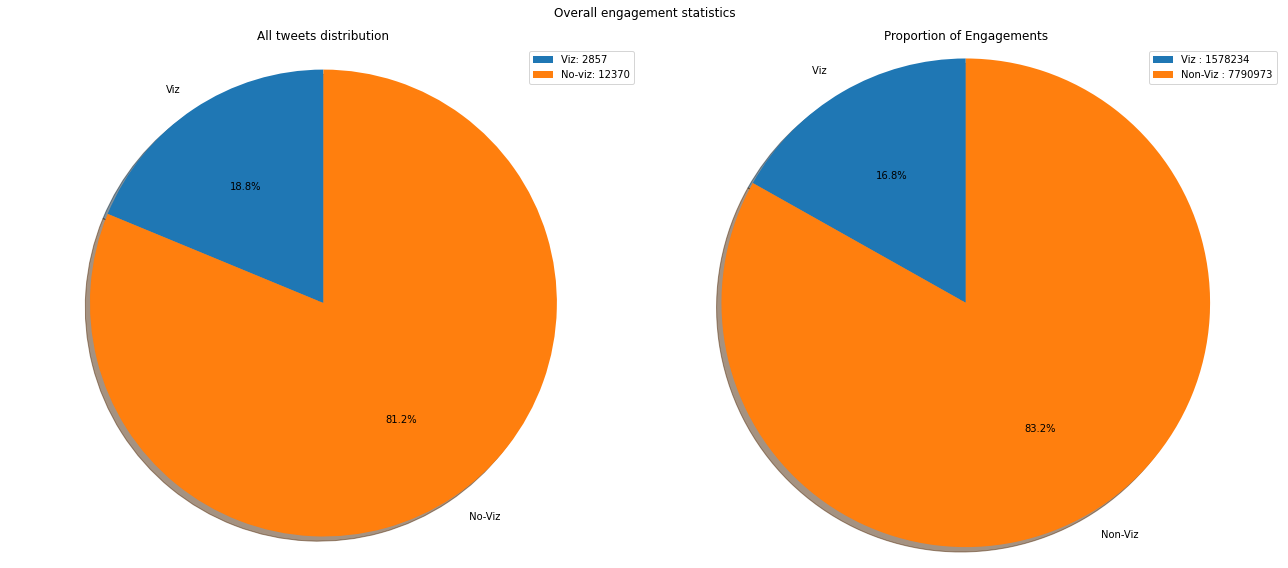

In [136]:
show_agg_pies(df)


In [137]:
def f(authors):
    disp_df = df.loc[df["user"] == authors]
    show_pies(disp_df, authors)
    show_bars(disp_df, authors)
    gen_time_series(disp_df, authors)

interact(f, authors=users);

interactive(children=(Dropdown(description='authors', options=('abmakulec', 'alicesim', 'AmeshAA', 'amymaxmen'…

In [138]:
# test_df

In [139]:
# dates = test_df["date"].tolist()

In [140]:
# truncated_dates = []

# for date in dates:
#     year = date.year
#     month = date.month
#     day = date.day
    
#     truncated_date = datetime.date(year, month, day)
#     truncated_dates.append(truncated_date)
    
# truncated_dates

In [141]:
# test_df["truncated_dates"] = truncated_dates
# test_df["truncated_dates"]
# # test_df.set_index(test_df["truncated_dates"])

In [142]:
# test_df = test_df.set_index(test_df["truncated_dates"])

In [143]:
# np.unique(np.array(truncated_dates))

In [144]:
# test_df["dt"],test_df["dt_m"] = test_df["date"].dt.year,test_df["date"].dt.month
# test_df["comb_date"] = test_df.apply(lambda row: str(row["dt"])+"-"+str(row["dt_m"]),axis=1)
# test_df

In [145]:
# test_df["comb_date"].unique()

In [146]:
# # Plot

# plt.plot(test_df["likes"], marker='o')

# # Labelling 

# plt.xlabel("date")
# plt.ylabel("Number of Likes")
# plt.title("Pandas Time Series Plot")

# # Display

# plt.show()

In [147]:
# # Plot scatter

# plt.scatter(test_df.index, test_df["likes"])

# # Labelling 

# plt.xlabel("Date")
# plt.ylabel("Number of Likes")

# # Auto space

# plt.tight_layout()

# # Display


# plt.show()